# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 5**
### **Normalización**

---

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:
- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

import os

In [2]:
os.getcwd()

'/mnt/c/Users/lidya/Documents/Nuestros documentos/Documentos de Lidya/Estudios/Adalab/modulos/modulo3/pair_programming/promo-d-da-modulo3-sprint1-elisa-lidya/regresion-lineal'

In [4]:
os.chdir('/mnt/c/Users/lidya/Documents/Nuestros documentos/Documentos de Lidya/Estudios/Adalab/modulos/modulo3/pair_programming/promo-d-da-modulo3-sprint1-elisa-lidya/regresion-lineal')

In [5]:
df_socio = pd.read_csv('../datos/esperanza_de_vida.csv', index_col=0)
df_socio.head(2)

,country,Region,Population in millions (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quantity of Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,Pop. using improved drinking water: urban(%),Pop. using improved drinking water: rural (%),Pollution index,"Life expectancy at birth, total (years)"
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.8,73.30,3.8,Muchos,139.59,58.40,37.37,96.2,98.3,53.33,76.372
1,Australia,Oceania,24.451,3.2,85.904,51352.2,9.4,74.25,3.4,Medios,176.54,101.94,57.58,100.0,100.0,24.58,82.500


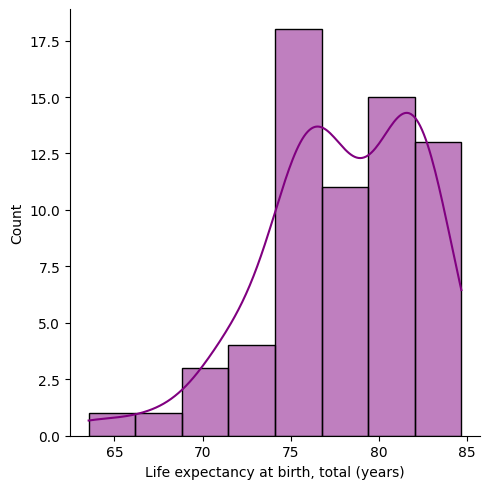

In [6]:
sns.displot(x='Life expectancy at birth, total (years)', data=df_socio, kde = True, color = "purple");

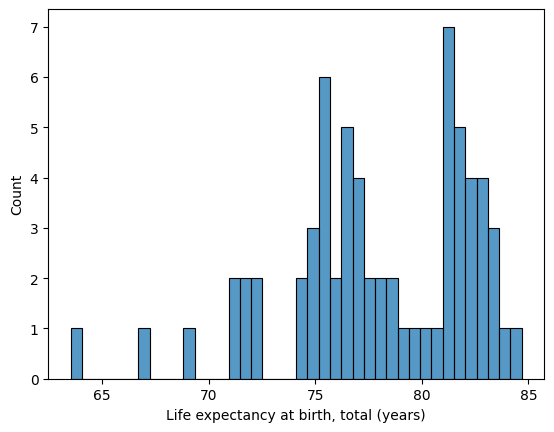

In [7]:
sns.histplot(x=df_socio["Life expectancy at birth, total (years)"], bins = 40);

In [8]:
#sacamos la normalización con el modelo de MinMaxScaler

numericas = df_socio.select_dtypes(include=np.number)
numericas.head()

,Population in millions (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,Pop. using improved drinking water: urban(%),Pop. using improved drinking water: rural (%),Pollution index,"Life expectancy at birth, total (years)"
0,44.271,16.2,91.749,14564.5,4.8,73.30,3.8,139.59,58.40,37.37,96.2,98.3,53.33,76.372000
1,24.451,3.2,85.904,51352.2,9.4,74.25,3.4,176.54,101.94,57.58,100.0,100.0,24.58,82.500000
2,8.736,106.0,58.094,44117.7,11.2,80.91,5.2,190.37,95.66,80.75,100.0,100.0,21.90,81.643902
3,9.468,46.7,78.134,5750.8,5.7,53.76,4.1,119.23,36.43,77.74,94.1,95.2,39.64,74.129268
4,11.429,377.5,97.961,40277.8,10.6,78.92,3.0,160.52,91.02,55.49,99.5,99.4,48.92,81.492683


In [9]:
df_socio_copy = df_socio.copy()

In [10]:
minmax = MinMaxScaler()
minmax.fit(df_socio_copy[['Life expectancy at birth, total (years)']])
vr_norm = minmax.transform(df_socio_copy[['Life expectancy at birth, total (years)']])

In [11]:
df_norm = pd.DataFrame(vr_norm, columns=['Life expectancy at birth, total (sk-normalized)'])
df_norm.head()

,"Life expectancy at birth, total (sk-normalized)"
0,0.607024
1,0.896867
2,0.856375
3,0.500947
4,0.849223


In [12]:
df_socio_copy['Life expectancy at birth, total (sk-normalized)'] = df_norm

In [13]:
df_socio_copy.head()

,country,Region,Population in millions (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quantity of Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,Pop. using improved drinking water: urban(%),Pop. using improved drinking water: rural (%),Pollution index,"Life expectancy at birth, total (years)","Life expectancy at birth, total (sk-normalized)"
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.8,73.30,3.8,Muchos,139.59,58.40,37.37,96.2,98.3,53.33,76.372000,0.607024
1,Australia,Oceania,24.451,3.2,85.904,51352.2,9.4,74.25,3.4,Medios,176.54,101.94,57.58,100.0,100.0,24.58,82.500000,0.896867
2,Austria,WesternEurope,8.736,106.0,58.094,44117.7,11.2,80.91,5.2,Muchos,190.37,95.66,80.75,100.0,100.0,21.90,81.643902,0.856375
3,Belarus,EasternEurope,9.468,46.7,78.134,5750.8,5.7,53.76,4.1,Muchos,119.23,36.43,77.74,94.1,95.2,39.64,74.129268,0.500947
4,Belgium,WesternEurope,11.429,377.5,97.961,40277.8,10.6,78.92,3.0,Medios,160.52,91.02,55.49,99.5,99.4,48.92,81.492683,0.849223


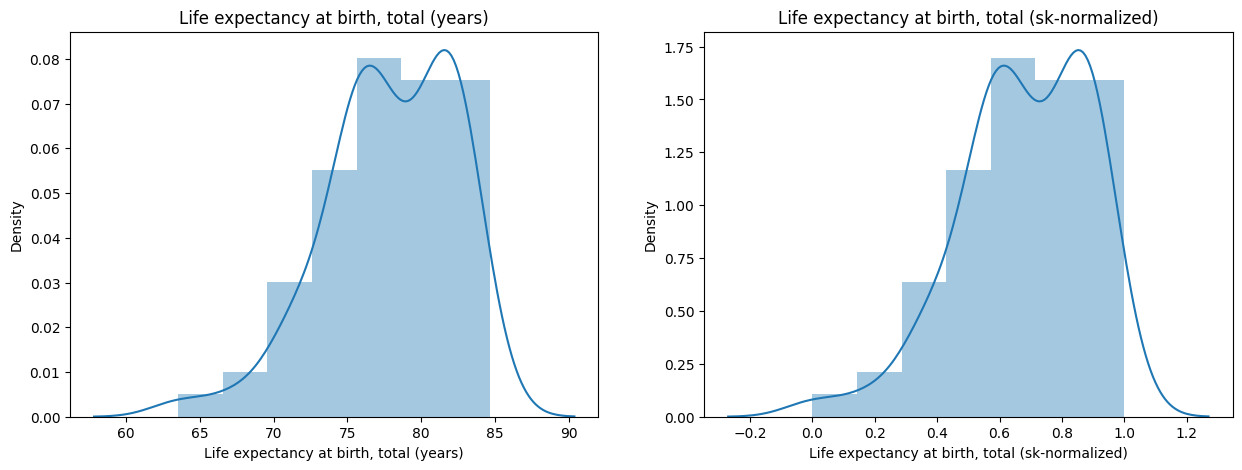

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Life expectancy at birth, total (years)')
axes[1].set_title('Life expectancy at birth, total (sk-normalized)')

sns.distplot(df_socio_copy['Life expectancy at birth, total (years)'] ,ax = axes[0])
sns.distplot(df_socio_copy['Life expectancy at birth, total (sk-normalized)'], ax = axes[1]);

In [15]:
stats.shapiro(df_socio_copy['Life expectancy at birth, total (sk-normalized)'])

ShapiroResult(statistic=0.9383593201637268, pvalue=0.0026618840638548136)

`Dado que el MinMaxScaler no nos ha dado resultado, procedemos a realizar el Boxcox.`

In [16]:
df_socio_copy['Life expectancy at birth, total (bc-normalized)'], lambda_bc = stats.boxcox(df_socio_copy['Life expectancy at birth, total (years)'])

In [17]:
df_socio_copy.head()

,country,Region,Population in millions (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quantity of Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,Pop. using improved drinking water: urban(%),Pop. using improved drinking water: rural (%),Pollution index,"Life expectancy at birth, total (years)","Life expectancy at birth, total (sk-normalized)","Life expectancy at birth, total (bc-normalized)"
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.8,73.30,3.8,Muchos,139.59,58.40,37.37,96.2,98.3,53.33,76.372000,0.607024,1.596496e+11
1,Australia,Oceania,24.451,3.2,85.904,51352.2,9.4,74.25,3.4,Medios,176.54,101.94,57.58,100.0,100.0,24.58,82.500000,0.896867,2.611737e+11
2,Austria,WesternEurope,8.736,106.0,58.094,44117.7,11.2,80.91,5.2,Muchos,190.37,95.66,80.75,100.0,100.0,21.90,81.643902,0.856375,2.443653e+11
3,Belarus,EasternEurope,9.468,46.7,78.134,5750.8,5.7,53.76,4.1,Muchos,119.23,36.43,77.74,94.1,95.2,39.64,74.129268,0.500947,1.320137e+11
4,Belgium,WesternEurope,11.429,377.5,97.961,40277.8,10.6,78.92,3.0,Medios,160.52,91.02,55.49,99.5,99.4,48.92,81.492683,0.849223,2.414933e+11


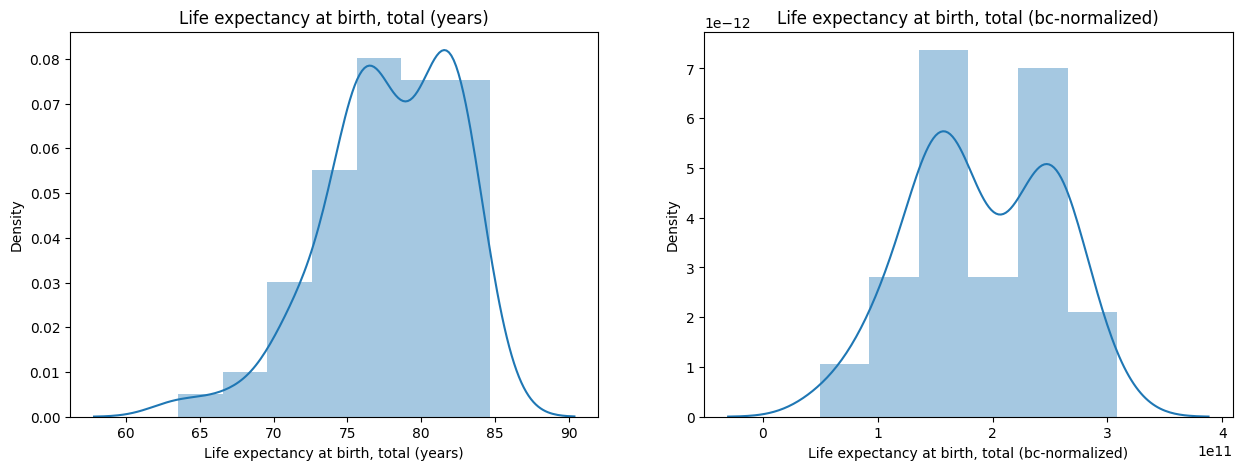

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Life expectancy at birth, total (years)')
axes[1].set_title('Life expectancy at birth, total (bc-normalized)')

sns.distplot(df_socio_copy['Life expectancy at birth, total (years)'] ,ax = axes[0])
sns.distplot(df_socio_copy['Life expectancy at birth, total (bc-normalized)'], ax = axes[1]);

In [19]:
stats.shapiro(df_socio_copy['Life expectancy at birth, total (bc-normalized)'])

ShapiroResult(statistic=0.965214192867279, pvalue=0.06095486134290695)

In [20]:
df_socio_copy.drop('Life expectancy at birth, total (sk-normalized)', axis=1, inplace=True)

In [21]:
df_socio_copy.head()

,country,Region,Population in millions (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quantity of Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,Pop. using improved drinking water: urban(%),Pop. using improved drinking water: rural (%),Pollution index,"Life expectancy at birth, total (years)","Life expectancy at birth, total (bc-normalized)"
0,Argentina,SouthAmerica,44.271,16.2,91.749,14564.5,4.8,73.30,3.8,Muchos,139.59,58.40,37.37,96.2,98.3,53.33,76.372000,1.596496e+11
1,Australia,Oceania,24.451,3.2,85.904,51352.2,9.4,74.25,3.4,Medios,176.54,101.94,57.58,100.0,100.0,24.58,82.500000,2.611737e+11
2,Austria,WesternEurope,8.736,106.0,58.094,44117.7,11.2,80.91,5.2,Muchos,190.37,95.66,80.75,100.0,100.0,21.90,81.643902,2.443653e+11
3,Belarus,EasternEurope,9.468,46.7,78.134,5750.8,5.7,53.76,4.1,Muchos,119.23,36.43,77.74,94.1,95.2,39.64,74.129268,1.320137e+11
4,Belgium,WesternEurope,11.429,377.5,97.961,40277.8,10.6,78.92,3.0,Medios,160.52,91.02,55.49,99.5,99.4,48.92,81.492683,2.414933e+11


- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [22]:
# Eliminamos de este df la variable respuesta sin normalizar.

df_socio_copy.drop('Life expectancy at birth, total (years)', axis = 1, inplace = True)

In [25]:
df_socio_copy.to_csv('../datos/esperanza_vida_transformado.csv')